<h2>Data Analytics- notebook template and instructions</h2>

<h4><b>Dataset name / short description:</b></h4>

Significant earthquakes includes the date, time, and location of all earthquakes with magnitude of 5.5 or higher

<h4><b>Data source (url):</b></h4>

https://www.kaggle.com/datasets/usgs/earthquake-database

<h4><b>Data format:</b></h4>

Single csv-file

<h4><b>Data description, features and limitations:</b></h4>

Earthquake data from The National Earthquake Information Center (NEIC). The data includes all significant (magnitude over 5.5) earthquakes between 1965-2016.

<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [82]:
# importing the usual data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# load the data
earthquakes = pd.read_csv("database.csv")

<h3><b>Code: Data clean-up procedure</b></h3>

This data had many columns with a lot of missing values or too detailed information (like ID). They were removed except for 'Root Mean Square' (= value that represents the overall energy release of the earthquake) where NaN values were filled with averages. Date column was divided into separate 'Year' and 'Month' columns for better analysis.

In [83]:
# remove columns with too many NaN values or too specific info
earthquakes = earthquakes.drop(['Time', 'Depth Error', 'Depth Seismic Stations', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error',
                  'ID', 'Source', 'Magnitude Error', 'Magnitude Seismic Stations', 'Location Source', 'Magnitude Source', 'Status'], axis=1)

# fill missing values from Root Mean Square with the average
earthquakes['Root Mean Square'].fillna((earthquakes['Root Mean Square'].mean()), inplace=True)

# convert Date column to datetime 
earthquakes['Date'] = pd.to_datetime(earthquakes['Date'],  errors='coerce')

# remove whatever NaN is left
earthquakes = earthquakes.dropna()

# add two new columns -> year and month
earthquakes['Year'] = earthquakes['Date'].dt.year.astype(int)
earthquakes['Month'] = earthquakes['Date'].dt.month.astype(int)

# remove the original date column 
earthquakes = earthquakes.drop('Date', axis=1)


C:\Users\stina\AppData\Local\Temp\ipykernel_15236\595334626.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  earthquakes['Root Mean Square'].fillna((earthquakes['Root Mean Square'].mean()), inplace=True)


<h3><b>Code: Data analysis</b></h3>

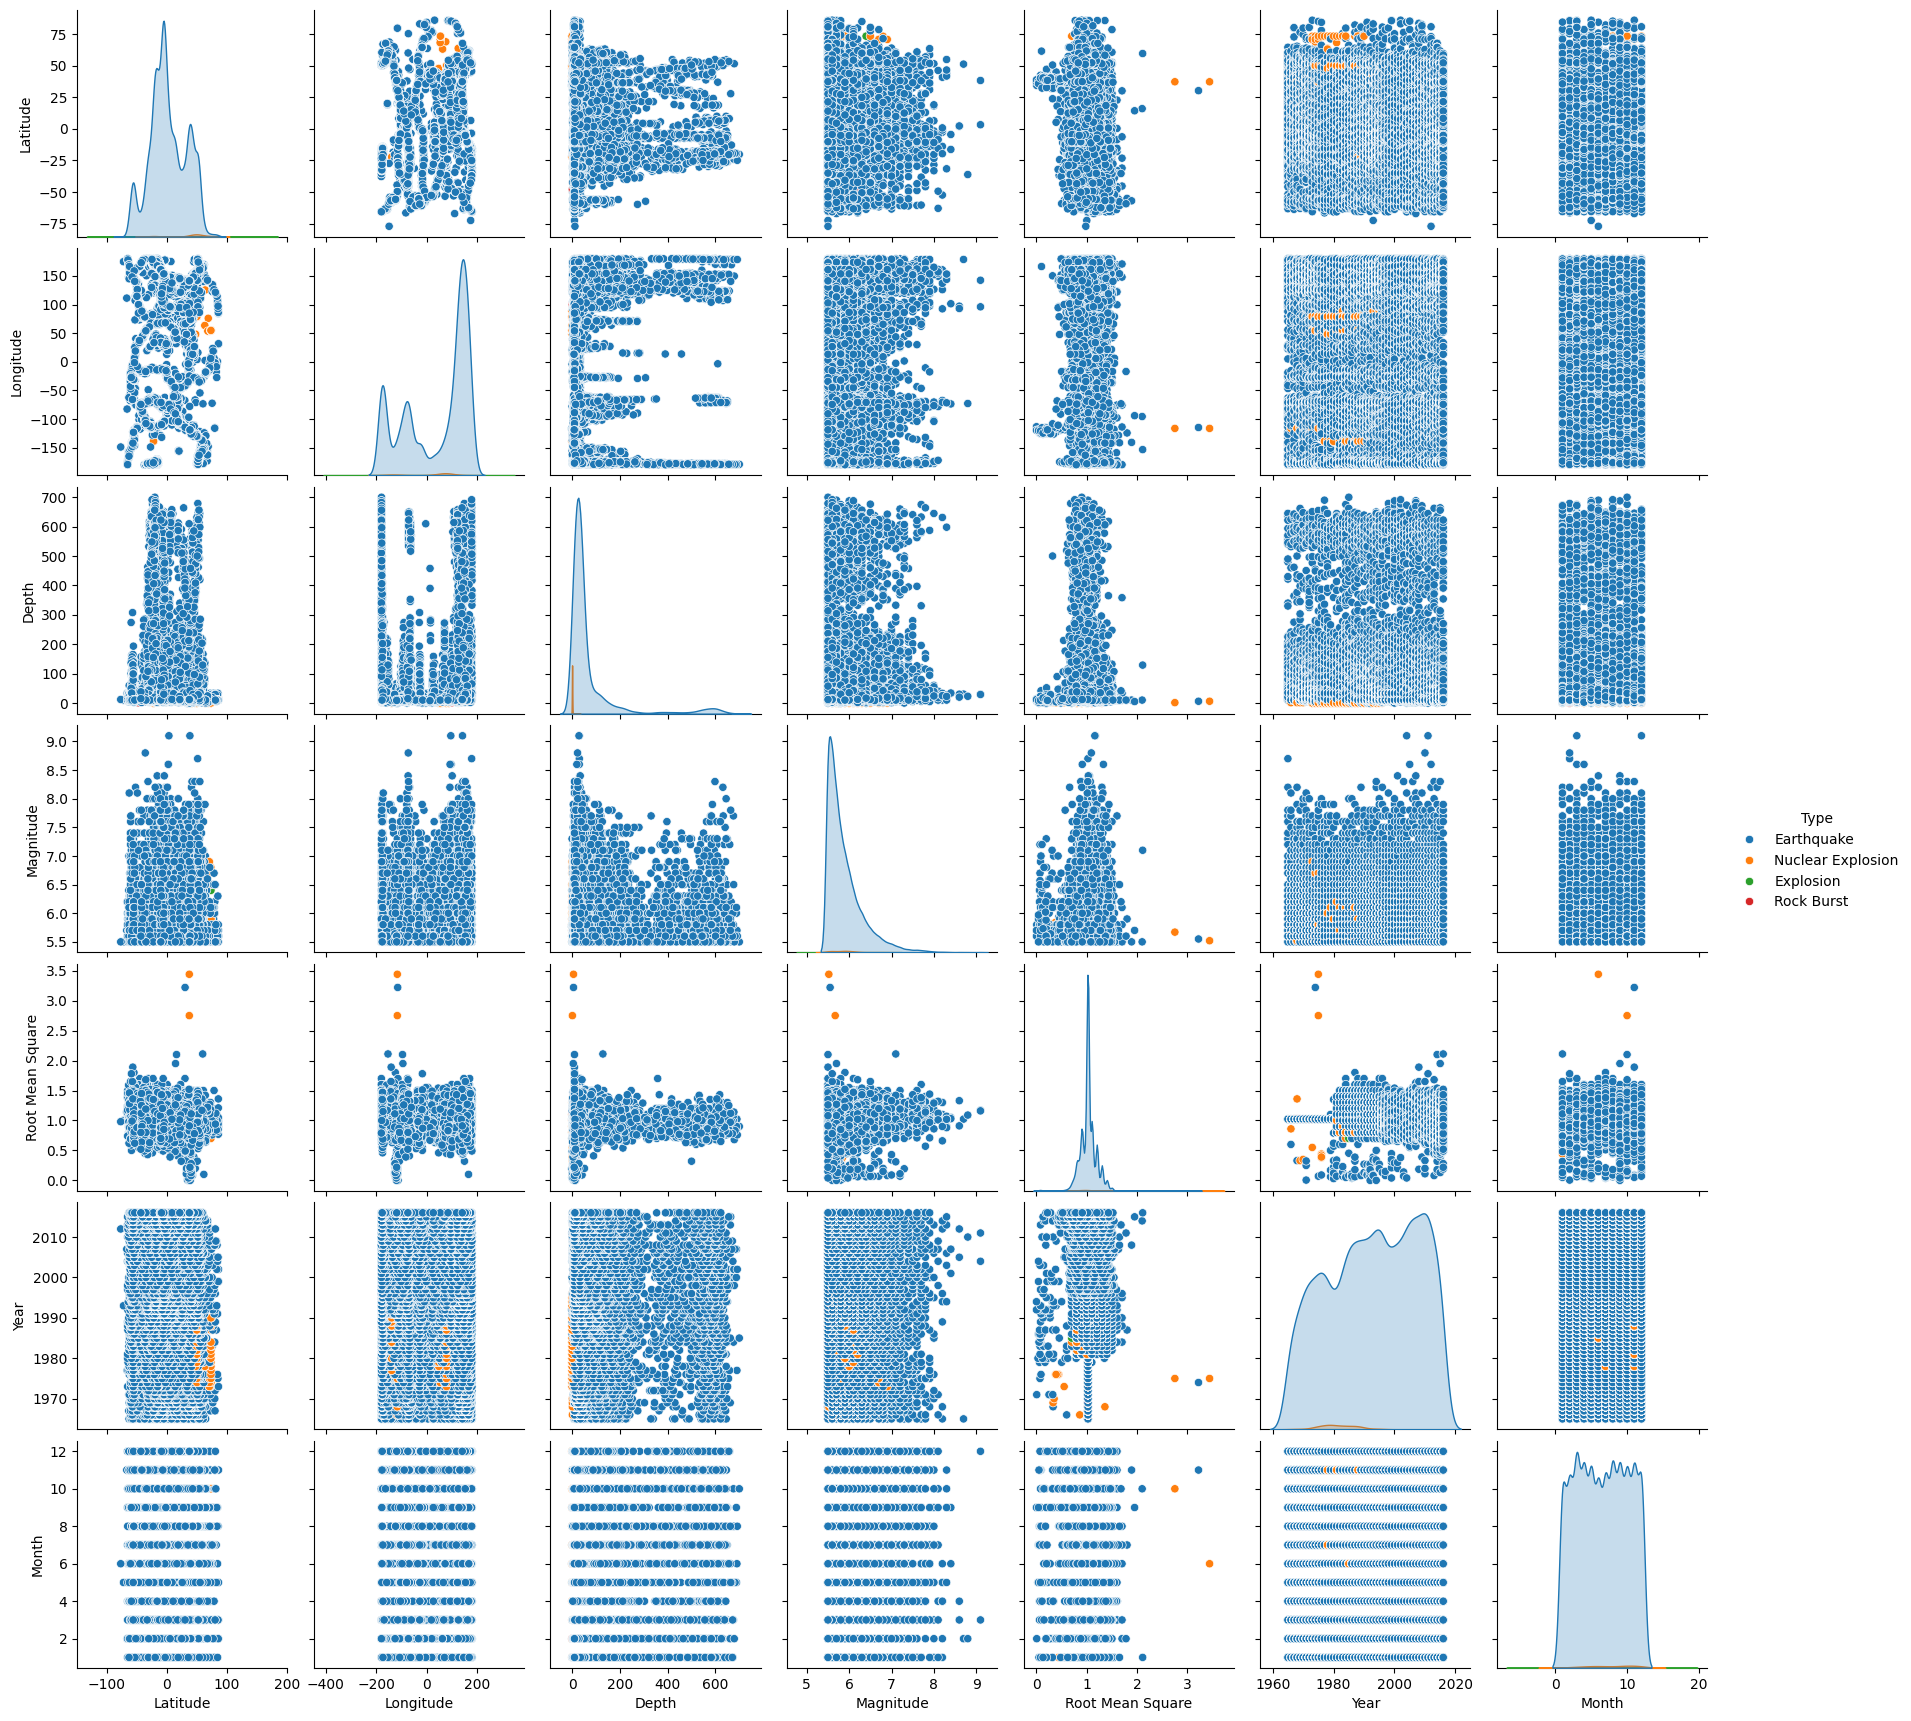

In [85]:
# pairplot to see how the data is scattered
sns.pairplot(earthquakes, hue="Type")

# no correlations
# earthquakes from nuclear explosions have happened in same areas 

<Axes: xlabel='Year', ylabel='Month'>

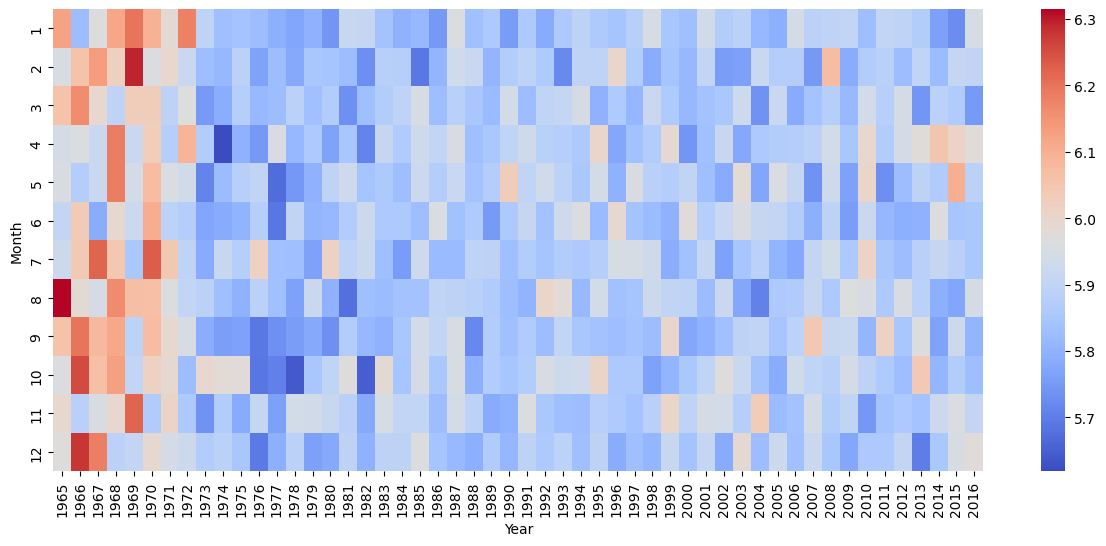

In [86]:
# heatmap to see activity by month and year
pt = earthquakes.pivot_table(index='Month', columns='Year', values='Magnitude')
plt.figure(figsize=(15, 6))
sns.heatmap(pt, cmap='coolwarm', xticklabels=True)

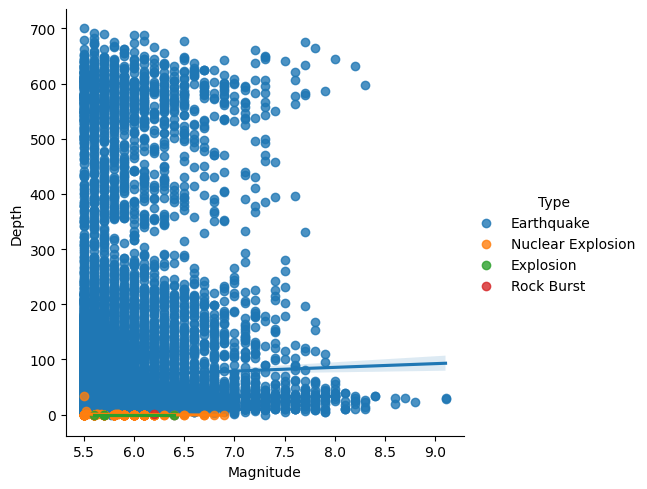

In [87]:
# regression plot for Magnitude/Depth, hue on Type
sns.lmplot( x='Magnitude', y='Depth', data=earthquakes, hue='Type')

# Depth = distance from the Earth's surface to where the seismic energy is generated

<Axes: xlabel='Magnitude Type', ylabel='Magnitude'>

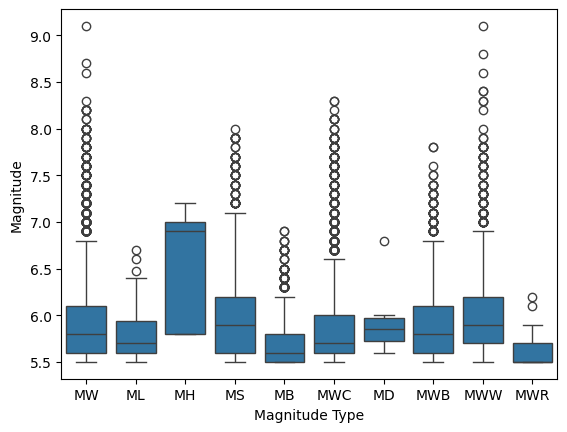

In [88]:
# boxplot to check what 'Magnitude Types' have been used to determine 
# the magnitude 
sns.boxplot(x='Magnitude Type', y='Magnitude', data=earthquakes)

# MW (nowadays MWW) is used to measure the largest earthquakes

<Axes: xlabel='Magnitude Type', ylabel='Magnitude'>

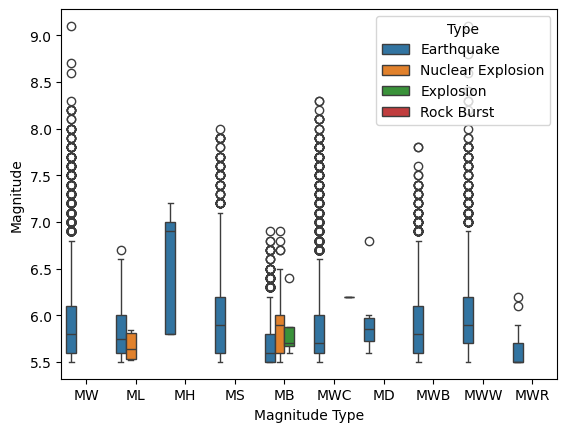

In [89]:
# boxplot which 'Magnitude Type' is used to measure different earthquakes
sns.boxplot(x='Magnitude Type', y='Magnitude', data=earthquakes, hue="Type")

<h3><b>Results and summary:</b></h3>

There are no correlations between the data. The earthquakes seem to happen regularly in the likely areas. The strongest earthquakes are generated very close or very deep in the Earth's surface. The earthquakes magnitude can be measured by different methods, MW/MWW is the most popular and realiable way to measure large natural earthquakes. However, earthquakes caused by explosions are measured using ML or MB.

<h3><b>Ideas for further improvements:</b></h3>

We could improve the data analysis by adding other major natural events like tsunamis or volcano eruptions to see if they correlate with each other.